# El tratamiento de las variables categoricas

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"],prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"],prefix="City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [49]:
feature_cols = ["Monthly Income",
                "Transaction Time",
                "Gender_Female",
                "Gender_Male",
                "City_Tier 1",
                "City_Tier 2",
                "City_Tier 3",
                "Record",
                "Age ",
                " Items ",
               ]

In [50]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [51]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [52]:
lm.intercept_ # Factor alpha

-643.7731838035506

In [53]:
lm.coef_

array([ 1.47731711e-01,  1.69048699e-01, -1.31627781e+02,  1.31627781e+02,
        6.98809779e+01,  5.04144467e+01, -1.20295425e+02,  7.71442188e+02,
        6.18968657e+00,  3.93442110e+01])

In [54]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14773171095343043),
 ('Transaction Time', 0.16904869866853112),
 ('Gender_Female', -131.62778138807408),
 ('Gender_Male', 131.62778138807408),
 ('City_Tier 1', 69.88097793487164),
 ('City_Tier 2', 50.41444665204421),
 ('City_Tier 3', -120.29542458691608),
 ('Record', 771.4421878591879),
 ('Age ', 6.189686573746982),
 (' Items ', 39.34421096996615)]

In [55]:
lm.score(X,Y)

0.922356824990408

El modelo puede ser escrito como:
   * **Total_Spend = lm.intercept_ * (n) Variables**

## Eliminar variables dummy redundantes

In [57]:
dummy_gender = pd.get_dummies(df["Gender"],prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [58]:
dummy_city_tier = pd.get_dummies(df["City Tier"],prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [61]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)

In [62]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [67]:
feature_cols = ["Monthly Income",
               "Transaction Time",
               "Gender_Male",
                "City_Tier 2",
                "City_Tier 3",
                "Record"
               ]

In [68]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [69]:
lm.intercept_

-133.67781754642238

In [70]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205752),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Male', 262.05002651109413),
 ('City_Tier 2', -21.625351701262886),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.2334457445638)]

In [71]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables del modelo:

* ('Monthly Income', 0.14773171095343043),
* ('Transaction Time', 0.16904869866853112),
* ('Gender_Female', -131.62778138807408),
* ('Gender_Male', 131.62778138807408),
* ('City_Tier 1', 69.88097793487164),
* ('City_Tier 2', 50.41444665204421),
* ('City_Tier 3', -120.29542458691608),
* ('Record', 771.4421878591879),
* ('Age ', 6.189686573746982),
* (' Items ', 39.34421096996615)]
 
Coeficientes tras enmascarar las variables dummy pertinentes:
 
 
* ('Monthly Income', 0.14753898049205752),
* ('Transaction Time', 0.1549461254958957),
* ('Gender_Male', 262.05002651109413),
* ('City_Tier 2', -21.625351701262886),
* ('City_Tier 3', -208.6676263302229),
* ('Record', 772.2334457445638)]

Los cambios se reflejan en:


* Gender_Male 
    * Antes -> 131.62,
    * Despues 262.050 = (131.62-(-1341.62))
* Gender_Female:
    * Antes -> -131.62,
    * Despues -> 0
* CT1:
    * Antes -> 69.88, 
    * Despues -> 0
* CT2:
    * Antes -> 50.41,
    * Despues -> -21.62 = (55.13-76.76)
* CT2:
    * Antes -> -131.90,
    * Despues -> -208.66 = (-131.90 - 76.76)

# Transformacion de variables para conseguir una relacion no lineal

In [2]:
import pandas as pd

In [3]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")

In [4]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
data_auto.shape

(406, 9)

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

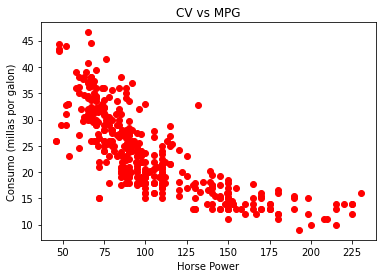

In [7]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Horse Power")
plt.ylabel("Consumo (millas por galon)")
plt.title("CV vs MPG")

## Modelo de regresion lineal

* mpg = a + b * horsepower

In [18]:
X =data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y =data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

/Library/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [15]:
type(X)

pandas.core.series.Series

In [20]:
type(X_data)

numpy.ndarray

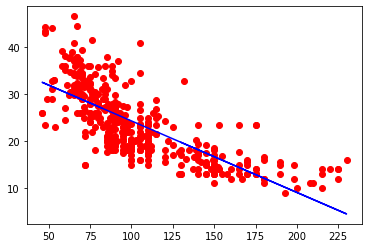

In [22]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X_data),color="blue")

In [23]:
lm.score(X_data, Y)

0.5746533406450252

In [26]:
SSD =np.sum((Y -lm.predict(X_data))**2)
RSE =np.sqrt(SSD/(len(X_data)-1))
y_mean =np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(10315.751960060918,
 5.046879480825511,
 23.514572864321607,
 0.21462773361633472)

## Modelo de regresion cuadratico

* mpg = a + b * horsepower ^ 2

In [27]:
X_data = X**2
X_data = X_data[:,np.newaxis]

/Library/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [28]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [29]:
lm.score(X_data, Y)

0.4849887034823205

In [31]:
SSD =np.sum((Y -lm.predict(X_data))**2)
RSE =np.sqrt(SSD/(len(X_data)-1))
y_mean =np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

## Modelo de regresion lineal y cuadratico

* mpg = a + b * horsepower + c * horsepower ^ 2

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [38]:
poly = PolynomialFeatures(degree=2)

In [39]:
X_data = poly.fit_transform(X[:,np.newaxis])

/Library/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [40]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [41]:
lm.score(X_data,Y)

0.6439066584257469

In [42]:
lm.intercept_

55.026192447081144

In [43]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 * 0.434 * hp + 0.00112615 * hp^2


In [45]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = LinearRegression()
    lm.fit(X_data,Y)
    print("Regresion de grado"+str(d))
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)

Regresion de grado2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
Regresion de grado3
0.6444678885560744
58.44877411148572
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
Regresion de grado4
0.6467674189704502
40.096643848808654
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
Regresion de grado5
0.6547512491371934
-40.69402885502241
[ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]


/Library/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so w

In [47]:
def regression_validation(lm, X_data, Y):
    SSD =np.sum((Y -lm.predict(X_data))**2)
    RSE =np.sqrt(SSD/(len(X_data)-1))
    y_mean =np.mean(Y)
    error = RSE/y_mean
    SSD, RSE, y_mean, error*100

In [48]:
regression_validation(lm, X_data, Y)